# No stereotype threat effect in international chess


_Stafford, T. (2016). No stereotype threat effect in international chess, Annual Conference of the Cognitive Science Society, 10-13th August 2016, Philadelphia, USA_

Full paper at [osf.io/pngyq/](https://osf.io/pngyq/)

Come see the poster - number 98, Friday, 1pm @ CogSci16

## Background:

Stereotype threat is where awareness of your identity as a member of a social group causes you to act in line with stereotypes about that group, especially in cases where this harms your performance. The phenomena was first discussed in the context of black americans and intelligence tests, and has subsequently been applied to women's performance at mathematics.

Chess is a widely played game with high cognitive demands. Due to its pivotal role in work on reasoning, memory and expertise it has been called 'the drosophila of cogntive science'. Chess is also a male dominated activity, and there is correspondingly a stereotype that the best players are male and women are less able at the game.

We have obtained data on all games recorded by the international chess authority, FIDE, over the last five years. Because we have data on player and opponent gender, as well as player ratings, we are able to look with a high degree of statistical power for any evidence of a stereotype threat in international chess.

## The Data

We use the "Sonas 92" dataset from Jeff Sonas of Sonas Consulting. 

In [1]:
import pandas as pd #data munging 
import numpy as np #number functions
import os #directory and file functions
import pylab as plt #graphing functions
import socket #machine id
import seaborn as sns
from matplotlib.font_manager import FontProperties

print "working directory = " + os.getcwd()

#----------------- load subset of data, which contains only variables used in this analysis"
local=False
gamedatloc='gamedat_tenpc.csv' #10% of the players in the full dataset
if local:
    gamedatloc='../../../../Sonas92/gamedat2.csv' #full dataset not currently available, sorry

#games=pd.read_csv(gamedatloc,index_col=0,nrows=30000) #if you only want a trivial subset of the data
games=pd.read_csv(gamedatloc,index_col=0)
print "N games in data  = " + str(len(games)) #not all of these can be used because of missing data

working directory = /home/tom/Desktop/FIDEchess
N games in data  = 1180701


In [3]:
# Display the first 10 rows of the dataset
games.ix[:10,:]

,WhiteScore,pair,wElo,bElo
0,1.0,MM,2668,2656
1,1.0,MM,2643,2535
2,0.5,MM,2678,2691
3,0.5,MM,2611,2641
4,0.5,MM,2551,2663
5,1.0,MM,2626,2409
6,0.5,MM,2593,2416
7,0.0,MM,2520,2564
8,0.5,MM,2547,2567
9,1.0,MM,2440,2440


In [4]:
#----------------- graph params"
%matplotlib inline
fsize=(12,10)

binwidth=125
bins=np.arange(-625,627,binwidth)
ylimit_diff=0.08
fmts=['-^','-s','-o','-d','-v'] #marker shapes
lss=['--','-.','-','.',':'] # line styles
colours=['darkred','orange','b','indigo','k'] #line colours
lweight=2
sns.set(font_scale=2)



## Player ratings predict outcome

All players have a FIDE rating, which is updated based on their game outcomes according to the Elo system. For any game, the difference in player rating can be used to predict game outcome. We can inspect our data to see how well player ratings do in fact predict observed game outcome.

(-650, 650)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


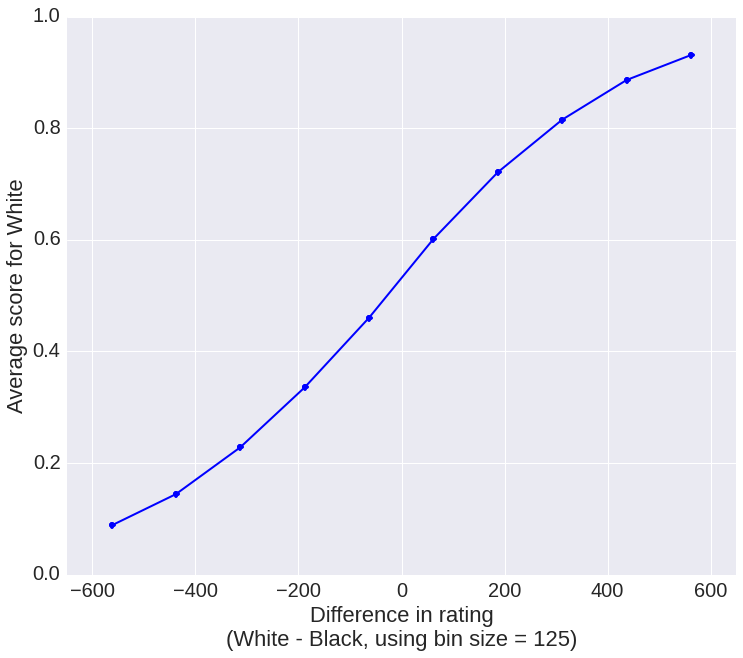

In [5]:
#------------ graph difference in player rating (White - Black) against mean score
# ----------- (White Win = 1, Black Wins = 0, draw = 0.5)

#categorise games by the difference in rating of the two players (White-Black)
games['diff']=games['wElo']-games['bElo']
games['rdiff_cat']=pd.cut(games['diff'],bins) 

#means
yvals=games.groupby(pd.cut(games['diff'],bins)).mean()['WhiteScore'] 
#standard errors
y_sem=games.groupby(pd.cut(games['diff'],bins)).sem()['WhiteScore']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=fsize)
axes.errorbar(bins[:-1]+binwidth/2,yvals,yerr=y_sem*1.96,color='b',fmt='-o',lw=lweight)
axes.set_xlabel('Difference in rating \n(White - Black, using bin size = ' + str(binwidth) + ')')
axes.set_ylabel('Average score for White')
axes.set_ylim([0,1])
axes.set_xlim([-650,650])


## A note about standard errors

95% standard error bars are shown on all plots. You just cannot see them at this resolution because the N is so large

## Changes in the rating-outcome function

Before we consider evidence for stereotype threat, it is instructive to look at how the relationship between difference in player ratings and game outcome can change, and how these changes can be represented.

To do this, consider how the rating-outcome function changes for games between the highest rated players compared to the lowest:

[None]

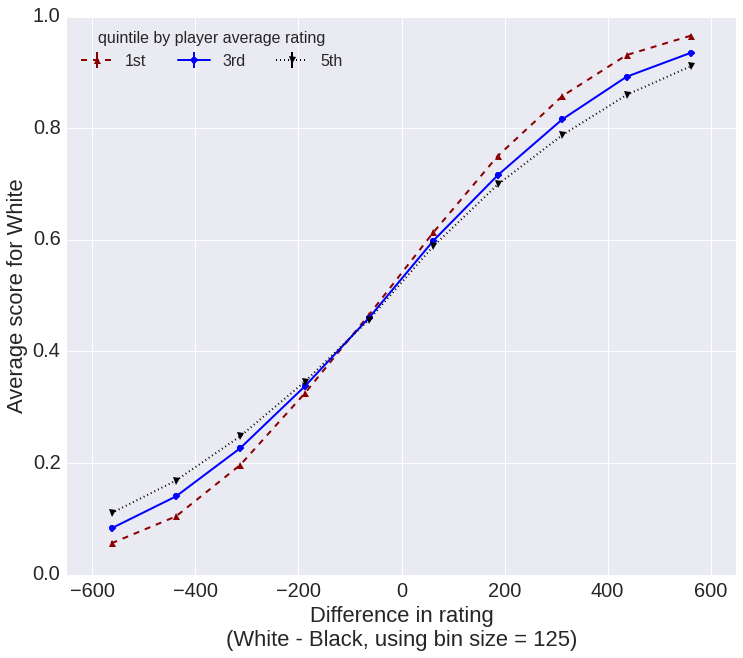

In [6]:
#plot rating difference - outcome function for different player average rating quintiles

games['avElo']=(games.wElo+games.bElo)/2 #calculate average rating of the two players for each game
games=games[~games.avElo.isnull()] #remove any missing data

quintile_groups=["5th","4th","3rd","2nd","1st"] #labels for the top 20%, top 21-41%, etc 
games['quintile']=pd.qcut(games.avElo,5,labels=quintile_groups) #categorise according to quintile

quintile_groups.reverse() #just so legend is easier to read
plot_these=['5th','3rd','1st'] #it's a tidier plot with just middle, top and bottom 20%

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=fsize)

for i,q in enumerate(quintile_groups):
    qn_mean=games[games.quintile==q].groupby('rdiff_cat').mean()['WhiteScore'] #mean
    qn_sem=games[games.quintile==q].groupby('rdiff_cat').sem()['WhiteScore'] #standard error
    if q in plot_these: 
        axes.errorbar(bins[:-1]+binwidth/2,qn_mean,yerr=qn_sem*1.96,color=colours[i],fmt=fmts[i],ls=lss[i],lw=lweight,label=q)

        
titletext= 'quintile by player average rating'

axes.set_xlabel('Difference in rating \n(White - Black, using bin size = ' + str(binwidth) + ')')
axes.set_ylabel('Average score for White')
axes.set_xlim([-650,650])

fontP = FontProperties()
fontP.set_size(16)
legend = plt.legend(loc=0, ncol=3, bbox_to_anchor=(0, 0, 1, 1),prop = fontP,fancybox=True,shadow=False,title=titletext)
plt.setp(legend.get_title(),fontsize=16)



See how the change in player average rating changs the sharpness of the function - the intepretation is that absolute differences in rating between players become more predictive for more highly rated players. In other words, higher rated players make more advantage of small differences in ability (note also that the advantage to white at 0 rating difference also grows as the player average rating rises).

Another way of representing is this is to take some standard curve as a baseline and look for variations around it. Doing this the plot above, using the middle 20% of games, becomes this:

[None]

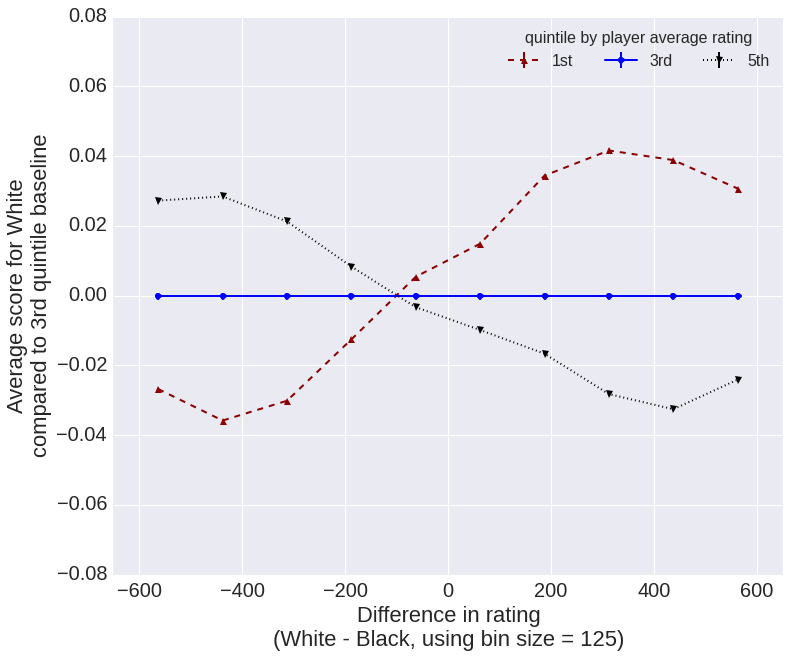

In [7]:
#calculate baseline
baseline = games[games.quintile=='3rd'].groupby('rdiff_cat').mean()['WhiteScore'] #mean
base_std = games[games.quintile=='3rd'].groupby('rdiff_cat').std()['WhiteScore'] #std
baseli_n = games[games.quintile=='3rd'].groupby('rdiff_cat').agg(len)['WhiteScore'] #count

#plot different groups
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=fsize)

for i,q in enumerate(quintile_groups):
    qn_mean=games[games.quintile==q].groupby('rdiff_cat').mean()['WhiteScore'] #mean
    qn_sd=games[games.quintile==q].groupby('rdiff_cat').std()['WhiteScore'] #standard deviation
    qn_count=games[games.quintile==q].groupby('rdiff_cat').agg(len)['WhiteScore'] #count
    if q in plot_these: 
        yvals=qn_mean-baseline #mean against baseline
        y_std=np.sqrt( ((qn_sd**2)/qn_count) + ((base_std**2)/baseli_n) ) #standard dev
        y_sem=y_std/np.sqrt(qn_count+baseli_n)
        if i ==2:
            y_sem=0 #all error is pushed into difference from baseline
        plt.errorbar(bins[:-1]+binwidth/2,yvals,yerr=y_sem*1.96,color=colours[i],fmt=fmts[i],ls=lss[i],lw=lweight,label=q)


axes.set_xlabel('Difference in rating \n(White - Black, using bin size = ' + str(binwidth) + ')')
axes.set_ylabel('Average score for White \ncompared to 3rd quintile baseline')
axes.set_xlim([-650,650])
axes.set_ylim([-ylimit_diff,ylimit_diff])

fontP = FontProperties()
fontP.set_size(16)
legend = plt.legend(loc=0, ncol=3, bbox_to_anchor=(0, 0, 1, 1),prop = fontP,fancybox=True,shadow=False,title=titletext)
plt.setp(legend.get_title(),fontsize=16)

Note - and this will be relevant later - if we had players who were over-rated (i.e. performing at a level below their numerical rating) then this would look like a shift up to the top left of this graph and a shift down to the bottom right. This is a flattening of the non-baselined curve (futher above). 

## Test of stereotype threat

Now we are ready to test for the existence of a stereotype threat effect. We do this by using our baseline games where two men play each other (MM; also the most numerous category) and compare

* FF - when two women play each other : no expected stereotype threat
* FM - when a women (white) plays a man (black) : stereotype threat predicted, decreasing chance of white win
* MF - when a man (white) plays a woman (black) : stereotype threat predicted, increasing chance of white win

Recall that we are plotting the effect of player gender across a range of rating differences. If there is a consistent stereotype effect then we would expect a shift down in the FM curve (and up in the MF) curve.

The literature suggests, however, that a stereotype threat is most likely under conditions of challenge or stress. Fortunately, player ratings allow us a quantative handle on challenge - the higher the opponent's rating is compared to yours the more challenging the game. 

Given this, we look for differences between the FM and the FF and MM groups, either in terms of a shift of the curve across the full range, or particularly towards larger player rating differences (i.e. for the FM curve towards the left of the graph, where the male/black player has an increasing rating advantage over the female/white player; and for the MF curve towards the right where the opposite is true).

For simplicity, we can add the MF results to the FM curve (by reverse coding the rating difference and comparing against the appropriate baseline (p(win|black) for the MM curve)

[None]

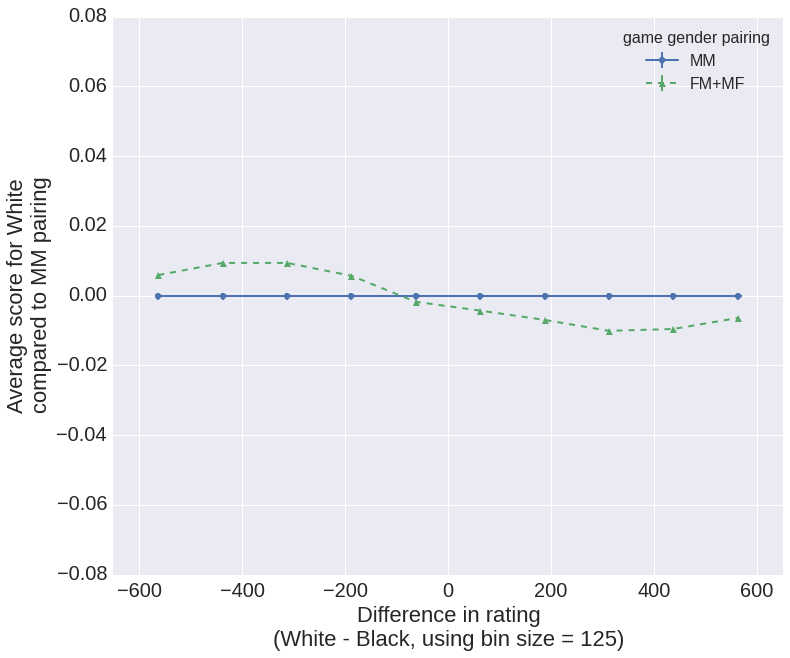

In [8]:
#our baseline: players are Male-Male
yvalsMM=games[games.pair=='MM'].groupby('rdiff_cat').mean()['WhiteScore']
y_semMM=games[games.pair=='MM'].groupby('rdiff_cat').sem()['WhiteScore']
y_stdMM=games[games.pair=='MM'].groupby('rdiff_cat').std()['WhiteScore']
y_cntMM=games[games.pair=='MM'].groupby('rdiff_cat').agg(len)['WhiteScore']

#players are female-female
yvalsFF=games[games.pair=='FF'].groupby('rdiff_cat').mean()['WhiteScore']
y_semFF=games[games.pair=='FF'].groupby('rdiff_cat').sem()['WhiteScore']
y_stdFF=games[games.pair=='FF'].groupby('rdiff_cat').std()['WhiteScore']
y_cntFF=games[games.pair=='FF'].groupby('rdiff_cat').agg(len)['WhiteScore']

#players are female-male
yvalsFM=games[games.pair=='FM'].groupby('rdiff_cat').mean()['WhiteScore']
y_stdFM=games[games.pair=='FM'].groupby('rdiff_cat').std()['WhiteScore']
y_cntFM=games[games.pair=='FM'].groupby('rdiff_cat').agg(len)['WhiteScore']

#players are female-male
yvalsMF=games[games.pair=='MF'].groupby('rdiff_cat').mean()['WhiteScore']
y_stdMF=games[games.pair=='MF'].groupby('rdiff_cat').std()['WhiteScore']
y_cntMF=games[games.pair=='MF'].groupby('rdiff_cat').agg(len)['WhiteScore']


#created weighted average of FM values with MF values by first comparing to appropriate baseline
#(p(win|white) for MM and p(win|black) for MM respectively)
yvalsFM_MF=(yvalsFM-yvalsMM)*(y_cntFM/(y_cntFM+y_cntMF))+(yvalsMF-yvalsMM)*(y_cntMF/(y_cntFM+y_cntMF))
y_cntFM_MF=y_cntFM+y_cntMF
y_stdFM_MF=np.sqrt( ((y_stdFM**2)/y_cntFM) + ((y_stdMF**2)/y_cntMF) )


#calculate standard deviations of differences from baseline 
y_stdFFdiff=np.sqrt( ((y_stdFF**2)/y_cntFF) + ((y_stdMM**2)/y_cntMM) )
y_stdFMdiff=np.sqrt( ((y_stdFM**2)/y_cntFM) + ((y_stdMM**2)/y_cntMM) )
y_stdMFdiff=np.sqrt( ((y_stdMF**2)/y_cntMF) + ((y_stdMM**2)/y_cntMM) )
y_stdFM_MFdiff=np.sqrt( ((y_stdFM_MF**2)/y_cntFM_MF) + ((y_stdMM**2)/y_cntMM) )

#calculate standard errors
#sem = std / sqrt(n)
y_semFFdiff= y_stdFFdiff / np.sqrt(y_cntFF+y_cntMM)
y_semFMdiff= y_stdFMdiff / np.sqrt(y_cntFM+y_cntMM)
y_semMFdiff= y_stdMFdiff / np.sqrt(y_cntMF+y_cntMM)
y_semFM_MFdiff = y_stdFM_MFdiff / np.sqrt(y_cntFM_MF+y_cntMM)


#plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=fsize)
axes.errorbar(bins[:-1]+binwidth/2,yvalsMM-yvalsMM,yerr=0,fmt=fmts[2],ls=lss[2],lw=lweight,label='MM')
#axes.errorbar(bins[:-1]+binwidth/2,yvalsFM-yvalsMM,yerr=y_semFMdiff*1.96,fmt='-d',ls=lss[0],lw=lweight,label='FM')
axes.errorbar(bins[:-1]+binwidth/2,yvalsFM_MF,yerr=y_semFM_MFdiff*1.96,fmt=fmts[0],ls=lss[0],lw=lweight,label='FM+MF')
#axes.errorbar(bins[:-1]+binwidth/2,yvalsMF-yvalsMM,yerr=y_semMFdiff*1.96,fmt='-d',ls=lss[0],lw=lweight,label='MF')
#axes.errorbar(bins[:-1]+binwidth/2,yvalsFF-yvalsMM,yerr=y_semFFdiff*1.96,fmt=fmts[4],ls=lss[4],lw=lweight,label='FF')
axes.set_xlabel('Difference in rating \n(White - Black, using bin size = ' + str(binwidth) + ')')
axes.set_ylabel('Average score for White \ncompared to MM pairing')
axes.set_ylim([-ylimit_diff,ylimit_diff])
axes.set_xlim([-650,650])

titletext= 'game gender pairing'
fontP = FontProperties()
fontP.set_size(16)
legend = plt.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),prop = fontP,fancybox=True,shadow=False,title=titletext)
plt.setp(legend.get_title(),fontsize=16)

**This comparison shows no stereotype threat effect**. When the female/white player has a lower rating than her male opponent her chances of victory are *greater* than for a comparable match between two male players with an equal rating difference. The overall effect is a 'flattening' of the rating-difference vs outcome curve, as happens with overall lower-rated players compared to higher-rated players.

For completeness we can add in the female-female (FF) pairings:

[None]

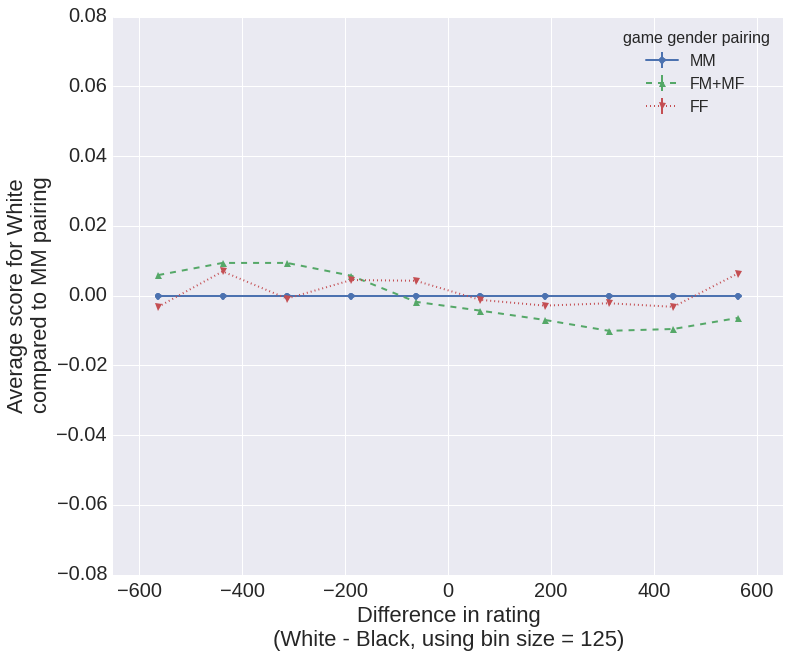

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=fsize)
axes.errorbar(bins[:-1]+binwidth/2,yvalsMM-yvalsMM,yerr=0,fmt=fmts[2],ls=lss[2],lw=lweight,label='MM')
#axes.errorbar(bins[:-1]+binwidth/2,yvalsFM-yvalsMM,yerr=y_semFMdiff*1.96,fmt='-d',ls=lss[0],lw=lweight,label='FM')
axes.errorbar(bins[:-1]+binwidth/2,yvalsFM_MF,yerr=y_semFM_MFdiff*1.96,fmt=fmts[0],ls=lss[0],lw=lweight,label='FM+MF')
#axes.errorbar(bins[:-1]+binwidth/2,yvalsMF-yvalsMM,yerr=y_semMFdiff*1.96,fmt='-d',ls=lss[0],lw=lweight,label='MF')
axes.errorbar(bins[:-1]+binwidth/2,yvalsFF-yvalsMM,yerr=y_semFFdiff*1.96,fmt=fmts[4],ls=lss[4],lw=lweight,label='FF')
axes.set_xlabel('Difference in rating \n(White - Black, using bin size = ' + str(binwidth) + ')')
axes.set_ylabel('Average score for White \ncompared to MM pairing')
axes.set_ylim([-ylimit_diff,ylimit_diff])
axes.set_xlim([-650,650])

fontP = FontProperties()
fontP.set_size(16)
legend = plt.legend(loc=0, ncol=1, bbox_to_anchor=(0, 0, 1, 1),prop = fontP,fancybox=True,shadow=False,title=titletext)
plt.setp(legend.get_title(),fontsize=16)

And calculate the number of games we are analysing

In [10]:
games.groupby('pair').count()['diff']

pair
FF     343806
FM     373679
MF     376450
MM    5612908
Name: diff, dtype: int64

In [11]:
print "N of x-gender pairings = " + str(games.groupby('pair').count()['diff']['FM']+games.groupby('pair').count()['diff']['MF'])

N of x-gender pairings = 750129


In [12]:
print "Total N of games = " + str(sum(games.groupby('pair').count()['diff']))

Total N of games = 6706843


## Conclusion

Chess games allow a quantative handle on challenge (difference in Elo rating of players), as well as a reliable measure of performance (game outcome). Our full dataset is more than 750,000 games where a woman plays a man, among a total ~6.7 million games. Across these games we find evidence that stereotype threat is not, on average, manifest in women's performance.

Obviously, this does not mean that stereotype threat doesn't manifest in other domains, or does not manifest for as-yet-underdiscovered subsets of our data. It does, however, put a limit on the generalitity of the phenomenon.

More analysis in our paper: _Stafford, T. (2016). No stereotype threat effect in international chess, Annual Conference of the Cognitive Science Society, 10-13th August 2016, Philadelphia, USA_ Available at [osf.io/pngyq/](https://osf.io/pngyq/), or come and talk to me at the poster - number 98, Friday, 1pm @ CogSci16

Tom Stafford  
t.stafford@sheffield.ac.uk  
[@tomstafford](https://twitter.com/tomstafford)
